In [2]:
# function to prepare to plot model output of land application
# first need combine with rangeland shapefile

# import modules
import pandas as pd
import numpy as np
import shapely as shp
import geopandas as gpd
from os.path import join as opj
import matplotlib.pyplot as plt
import os
import pickle


# suppress warnings in jupyter notebook!
import warnings
warnings.simplefilter('ignore')

def Fetch(df, key_col, key, value):
    #counties['disposal'].loc[counties['COUNTY']=='San Diego'].values[0]
    return df[value].loc[df[key_col]==key].values[0]

# set data path
DATA_DIR = "/Users/anayahall/projects/compopt/data"

# read in data
# rangeland polygons
rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp"))
# county polygons
county_shape = gpd.read_file(opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp")) # OLD- raw shape
counties_popcen = pd.read_csv("../data/counties/CenPop2010_Mean_CO06.txt") # NEW - population weighted means!
counties_popcen.rename(columns = {'LATITUDE': 'lat', 'LONGITUDE': 'lon', 'COUNAME': 'COUNTY'}, inplace=True)

county_shape = county_shape.to_crs(epsg=4326)
county_shape['county_centroid'] = county_shape['geometry'].centroid


# solid waste inventory data (CLEANED)
swis =  gpd.read_file(opj(DATA_DIR, "clean/clean_swis.shp"))


# Minimize geodataframe to dataframe with just fields of interest
swis_df = swis[['SwisNo', 'Name', 'Latitude', 'Longitude', 'cap_m3', 'AcceptedWa']]

# rename lat and lon for easier plotting
swis_df.rename(columns = {'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

# may just want foodwaste for adding to the plot
foodwaste_facilities = swis_df[swis_df['AcceptedWa'].str.contains("Food", na=False)]


##### FLAG - generate random data--- need to load real matrix of quantities here!!!
testmatrix = np.random.randint(100, size=(58, 109))
c2fmatrix = testmatrix


## LOAD REAL DATA HERE!!!! 
with open('../c2f_test.p', 'rb') as f:
    c2f_test = pickle.load(f) 
c2f_test

# PLOT
fig, ax = plt.subplots(figsize = (10,10))
county_shape.plot(ax = ax, color = "white", linewidth=0.3, edgecolor = "grey")
ax.plot(swis_df['lon'], swis_df['lat'], 'x')
# for i in range(len(counties)):
#     lon, lat = counties['county_centroid'][i].xy
#     ax.plot(lon, lat, c= 'lightgrey', marker='+')
for i in counties_sub.index:
#     print('**************')
#     print(c_i)
    county_name = counties_sub['COUNTY'].iloc[counties_sub.index == i].values[0]
    c_lon = counties_sub['lon'].iloc[counties_sub.index == i].values[0]
    c_lat = counties_sub['lat'].iloc[counties_sub.index == i].values[0]
    for j in swis_sub.index:
        f_no = swis_sub['SwisNo'].iloc[swis_sub.index == j].values[0]
        f_lon = swis_sub['lon'].loc[swis_sub.index == j].values[0]
        f_lat = swis_sub['lat'].loc[swis_sub.index == j].values[0]
        q = c2fmatrix.loc[c2fmatrix.index == f_no, county_name].values[0]
        if q!=0:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=0.5)
            # no plot
        if 0 < q <10000:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=0.5)
        elif q>100000:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=1.5)
plt.show()


NameError: name 'counties_sub' is not defined

In [36]:

# def plotrangelandapp(dictionary, name):
# rappdf = pd.DataFrame.from_dict(dictionary)
# # sum application on rangeland by all facilities
# rappdf['sum'] = rappdf.sum(axis = 1, skipna = True)*1000

# rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/grazingland_dis/CA_grazingland.shp")) #dissolved version
# rangelands = rangelands.to_crs(epsg=4326)

# # make column of object ID for merging
# rappdf['OBJECTID'] = rappdf.index
# # only keep id and summed 
# rappdf_min = rappdf[['sum', 'OBJECTID']]
# counties_popcen

In [3]:
import pickle
with open('../c2f_test.p', 'rb') as f:
    c2f_test = pickle.load(f) 
c2f_test

,Los Angeles,San Diego,Orange,Imperial
30-AB-0378,0,0,13181,0
37-AB-0011,0,0,13181,0
13-AA-0095,0,36331,0,58157
13-AA-0108,0,132874,0,0
37-AA-0975,0,118110,0,0
37-AA-0994,0,215551,0,0
30-AB-0461,0,0,132874,0
13-AA-0115,0,44291,0,0
37-AA-0988,0,206693,0,0
37-AA-0992,0,13181,0,0


In [ ]:
impor

In [ ]:
# try out on small subset
counties_sub = counties_popcen[(counties_popcen['COUNTY'] == "Los Angeles") | (counties_popcen['COUNTY'] == "San Diego") |
    (counties_popcen['COUNTY'] == "Orange")| (counties_popcen['COUNTY'] == "Imperial")]

# swis
# # # SUBSET out four counties
swis_sub = swis[(swis['County'] == "San Diego") | (swis['County'] == "Orange") | 
    (swis['County'] == "Imperial")]
swis_sub.rename(columns = {'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

c2fmatrix = c2f_test


In [37]:
# plotting!!!!!!!!!!!!!!!!!!!!!!!!!!
# plt.plot(swis_df['lon'], swis_df['lat'], 'x')
# for i in range(len(counties)):
#     lon, lat = counties['county_centroid'][i].xy
#     plt.plot(lon, lat, 'ro')
# plt.show()

# counties['lon'] = counties['county_centroid'].apply(lambda p: p.x)
# counties['lat'] = counties['county_centroid'].apply(lambda p: p.y)


# plt.plot([swis_df['lon'], counties['lon']], [swis_df['lat'], counties['lat']], '--')
# plt.show()



# maybe need to make connectivity matrix --- convert dict to dataframe
# 
# as matrix, 
# then loop through ids and FETCH values of lat, lon and value!



In [38]:
# swis_df['lat'].loc[swis_df['SwisNo']=='01-AA-0310'].values




# # merge with rangelands
# merge = pd.merge(rangelands, rappdf_min, on = "OBJECTID")
# # plot
# f, ax = plt.subplots()
# CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.3, edgecolor = "grey")
# # CA.set_geometry('centroid').plot(ax= ax, color = 'black')
# swis.plot(ax = ax, marker = '*', color = 'black', alpha=.7, markersize = 10, linewidth=0)
# merge.plot(ax= ax, column = merge['sum']**3, cmap = 'Greens', linewidth=0.03, alpha = 0.7,
# 	edgecolor = "green", legend = False)
# ax.axis('off')
# ax.set_title('Rangeland Application', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig(opj(OUT_DIR, str(name) + "_rangelandapps.png"), dpi=300)
# # plt.savefig(opj(OUT_DIR, "fg100_rangelandapps.png"), dpi=300)

,index,SwisNo,Name,County,Location,Place,Latitude,Longitude,Category,Activity,Operationa,AcceptedWa,Throughput,Throughp_1,Capacity,CapacityUn,Acreage,RemainingC,cap_m3,geometry
2,2,30-AB-0378,Golden Rain Foundation Composting Op.,Orange,24401 Moulton Parkway,Laguna Hills,33.60377,-117.72490,Composting,Composting Operation (Green Waste),Active,Green Materials,20.0,Tons/day,10000.0,Cu Yards/year,3.0,None,7645.55000,POINT (-117.7249 33.60377)
6,6,37-AB-0011,Miramar Wholesale Nursery,San Diego,5400 Governor Drive,San Diego,32.86220,-117.18050,Composting,Composting Operation (Green Waste),Closed,Green Materials,50.0,Tons/day,10000.0,Cu Yards/year,100.0,None,7645.55000,POINT (-117.1805 32.8622)
10,11,13-AA-0095,"Dune Spreading, LLC",Imperial,1408 East Hwy 78 at Hastin Rd.,Brawley,32.97484,-115.40676,Composting,Composting Operation (Ag),Active,"Agricultural,Manure",44000.0,Tons/year,32000.0,Tons/year,25.0,None,54803.30240,POINT (-115.40676 32.97484)
25,28,13-AA-0108,Dune Spreading LLC dba Imperial Compost,Imperial,3403 Casey Road,Brawley,32.90708,-115.42980,Composting,Composting Operation (Ag),Active,"Agricultural,Green Materials,Manure",30000.0,Tons/day,45000.0,Tons/year,25.0,None,77067.14400,POINT (-115.4298 32.90708)
42,49,37-AA-0975,Plants Choice Comp Material Handling Op.,San Diego,1700 Maxwell Road,Chula Vista,32.60333,-117.00500,Composting,Composting Operation (Green Waste),Active,"Green Materials,Wood waste",200.0,Tons/day,40000.0,Tons/year,4.0,None,68504.12800,POINT (-117.005 32.60333)
45,52,37-AA-0994,Ramona Organics,San Diego,324 Maple St.,Ramona,33.04528,-116.87768,Composting,Chipping and Grinding Activity Fac./ Op.,Active,"Green Materials,Wood waste",200.0,Tons/day,73000.0,Tons/year,3.5,None,125020.03360,POINT (-116.87768 33.04528)
56,63,30-AB-0461,"R&S Soil Products, Inc. Irvine",Orange,1 Magazine Rd.,Irvine,33.66969,-117.70503,Composting,Composting Operation (Green Waste),Active,"Green Materials,Wood waste",200.0,Tons/day,45000.0,Tons/year,12.0,None,77067.14400,POINT (-117.70503 33.66969)
64,71,13-AA-0115,SpreadCo. Inc.- Phillips,Imperial,910 Nichols Rd.,El Centro,32.71530,-115.59557,Composting,Composting Operation (Ag),Active,"Agricultural,Manure",350.0,Tons/day,15000.0,Tons/year,17.0,None,25689.04800,POINT (-115.59557 32.7153)
67,74,37-AA-0988,Otay Mesa Compost Facility,San Diego,468- A Alta Rd.,San Diego (in County of San Diego),32.58130,-116.91517,Composting,Composting Operation (Green Waste),Active,"Agricultural,Green Materials,Manure,Wood waste",200.0,Tons/day,70000.0,Tons/year,7.3,None,119882.22400,POINT (-116.91517 32.5813)
91,100,37-AA-0992,Evergreen Nursery Blossom Valley,San Diego,9708 Flinn Springs Rd.,El Cajon,32.85617,-116.85874,Composting,Composting Operation (Green Waste),Active,Green Materials,200.0,Cu Yards/day,10000.0,Cu Yards/year,1.5,None,7645.55000,POINT (-116.85874 32.85617)


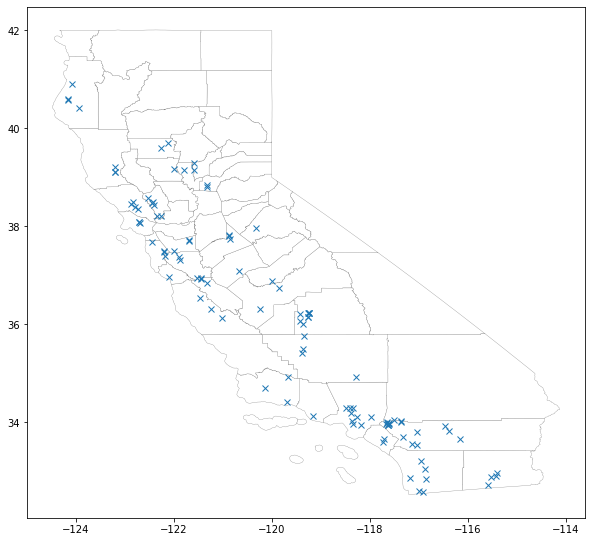

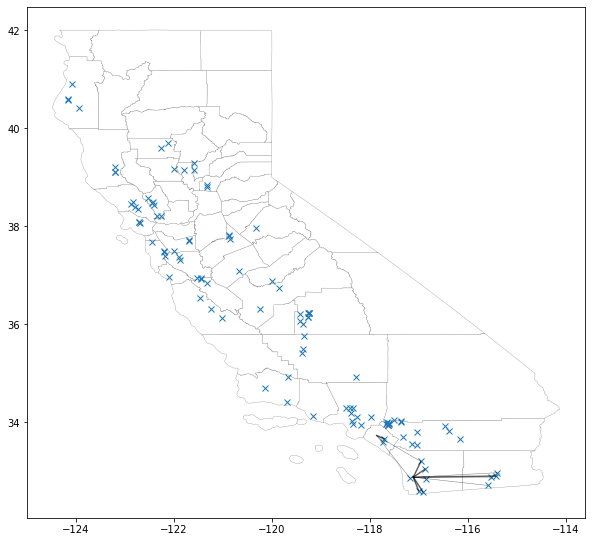

In [42]:
# c2fmatrix.loc[c2fmatrix.index == '30-AB-0378', 'Los Angeles'].values[0]
c2fmatrix

,Los Angeles,San Diego,Orange,Imperial
30-AB-0378,0,0,13181,0
37-AB-0011,0,0,13181,0
13-AA-0095,0,36331,0,58157
13-AA-0108,0,132874,0,0
37-AA-0975,0,118110,0,0
37-AA-0994,0,215551,0,0
30-AB-0461,0,0,132874,0
13-AA-0115,0,44291,0,0
37-AA-0988,0,206693,0,0
37-AA-0992,0,13181,0,0


In [ ]:
np.log(111546)

In [ ]:
# load csv?
# or load text file
# need to be able to load and replace for counties in existing model,
# then make sure to save dists and quants, run overnight on baseline



In [43]:
counties_popcen = pd.read_csv("../data/counties/CenPop2010_Mean_CO06.txt") # NEW - population weighted means!
# rename lat and lon for easier plotting
counties_popcen.rename(columns = {'LATITUDE': 'lat', 'LONGITUDE': 'lon', 'COUNAME': 'COUNTY'}, inplace=True)



In [45]:
counties_popcen
county_shape

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,county_centroid
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-120.6555981820125 39.69356523820564...,POINT (-120.5160095220462 39.58040534138337)
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-121.1885841398944 38.71431311442083...,POINT (-121.3442565381238 38.44931988767443)
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-120.5819095703916 34.0985617276066...,POINT (-120.0307987025528 34.5383488895296)
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,POLYGON ((-120.6309460064869 38.34110512435024...,POINT (-120.5541450750406 38.20461192173443)
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-119.6363143545649 33.2730446943631...,POINT (-119.1260395549243 34.35753335669822)
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,(POLYGON ((-118.6676142121397 33.4774937689833...,POINT (-118.2610291717207 34.19800634875839)
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081437574,497508807,+38.5251824,-122.9261095,POLYGON ((-122.9350733556339 38.31395694932694...,POINT (-122.9225580335378 38.52529754074384)
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,25260,None,A,3598583450,5468555,+36.0724780,-119.8155301,POLYGON ((-119.9589376692871 36.25547297916683...,POINT (-119.8155151216195 36.07536595977389)
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,POLYGON ((-117.4374379823408 33.17953480111068...,POINT (-116.7702192990426 33.02820801674721)
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644333049,246486852,+39.0620323,-120.7227181,"POLYGON ((-121.0654491573255 39.0065381484802,...",POINT (-120.71766471779 39.06343238008234)


In [46]:
# gross_inventory     = opj(DATA_DIR, "raw/biomass.inventory.csv"),
# technical_inventory = opj(DATA_DIR, "raw/biomass.inventory.technical.csv"),
# county_shapefile    = opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp"),
# fips_data           = opj(DATA_DIR, "interim/CA_FIPS.csv")


##################################################################
#read in biomass inventory
# GROSS inventory
gbm = pd.read_csv("../data/raw/biomass.inventory.csv")

,COUNTY,biomass.feedstock,disposal.yields,year,biomass.category
0,Alameda,APPLE,0.000000,2014,orchard vineyard culls
1,Alpine,APPLE,0.000000,2014,orchard vineyard culls
2,Amador,APPLE,0.000000,2014,orchard vineyard culls
3,Butte,APPLE,0.000000,2014,orchard vineyard culls
4,Calaveras,APPLE,0.000000,2014,orchard vineyard culls
5,Colusa,APPLE,0.000000,2014,orchard vineyard culls
6,Contra Costa,APPLE,0.000000,2014,orchard vineyard culls
7,Del Norte,APPLE,0.000000,2014,orchard vineyard culls
8,El Dorado,APPLE,43.153434,2014,orchard vineyard culls
9,Fresno,APPLE,34.673184,2014,orchard vineyard culls


In [47]:
newdf = pd.merge(counties_popcen, gbm, on="COUNTY")

In [48]:
newdf

,STATEFP,COUNTYFP,COUNTY,STNAME,POPULATION,lat,lon,biomass.feedstock,disposal.yields,year,biomass.category
0,6,1,Alameda,California,1510271,37.705201,-122.100393,APPLE,0.000000,2014,orchard vineyard culls
1,6,1,Alameda,California,1510271,37.705201,-122.100393,APRICOT,0.000000,2014,orchard vineyard culls
2,6,1,Alameda,California,1510271,37.705201,-122.100393,AVOCADO,0.000000,2014,orchard vineyard culls
3,6,1,Alameda,California,1510271,37.705201,-122.100393,EXOTIC,0.000000,2014,orchard vineyard culls
4,6,1,Alameda,California,1510271,37.705201,-122.100393,CHERRY,0.000000,2014,orchard vineyard culls
5,6,1,Alameda,California,1510271,37.705201,-122.100393,LEMON,0.000000,2014,orchard vineyard culls
6,6,1,Alameda,California,1510271,37.705201,-122.100393,CITRUS OTHER,0.000000,2014,orchard vineyard culls
7,6,1,Alameda,California,1510271,37.705201,-122.100393,DATE & FIG,0.000000,2014,orchard vineyard culls
8,6,1,Alameda,California,1510271,37.705201,-122.100393,KIWIFRUIT,0.000000,2014,orchard vineyard culls
9,6,1,Alameda,California,1510271,37.705201,-122.100393,NECTARINE,0.000000,2014,orchard vineyard culls
